In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#uncomment to delete the patches generated in the output directory
'''
import os
for i in ["FL","MCL","CLL"]:
    for j in os.listdir(os.path.join("/kaggle/working/",i)):
        os.unlink(os.path.join(os.path.join("/kaggle/working/",i),j))
        
#for i in ["CLL","FL","MCL"]:
#    os.mkdir(os.path.join("/kaggle/working",i))
# Any results you write to the current directory are saved as output.


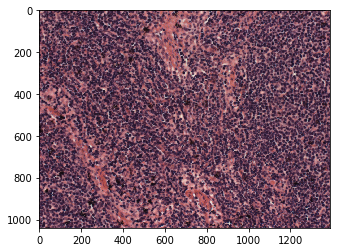

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as im

img = im.imread("/kaggle/input/lymphoma-classification/lymphoma/MCL/sj-05-4179-R1_009.tif")
plt.imshow(img)

In [29]:
dim = img.shape
dim


(1040, 1388, 3)

In [30]:
#To find the number of images per class



total_number_of_images=0



for i in os.listdir("/kaggle/input/lymphoma-classification/lymphoma/"):
    count   = 0
    for j in os.listdir(os.path.join("/kaggle/input/lymphoma-classification/lymphoma",i)):
        count = count + 1
    print(i,count) 
    total_number_of_images+=count
    
print("total_number_of_images ",total_number_of_images)

CLL 113
FL 139
MCL 122
total_number_of_images  374


In [50]:
from keras.utils import Sequence
import random
import cv2
from PIL import Image
import PIL
class Data_Generator(Sequence):
    
    def __init__(self,train_dir,label_dictionary,total_number_of_images=374,batch_size=32,
                 number_of_class=3,number_of_channels=3,shuffle=True,dim=(1040, 1388),new_dim=(32,32),
                 labels={0:"MCL",1:"CLL",2:"FL"}):
        #print("train_dir")
        self.train_dir=train_dir
        self.label_dictionary=label_dictionary
        self.batch_size=batch_size
        self.number_of_class=number_of_class
        self.number_of_channels=number_of_channels
        self.shuffle=shuffle
        self.total_number_of_images=total_number_of_images
        self.dim=dim
        self.new_dim=new_dim
        self.labels=labels
        self.len = self.__len__()
        if self.shuffle:
            self.shuffle_data()
        
    def  shuffle_data(self):
        random.shuffle(self.train_dir)
      
            
            
    def __len__(self):
        return (self.total_number_of_images//self.batch_size)
    
    def __getitem__(self,index):
        #print("HELLo")
        for i in range(self.batch_size):
            if(index*self.batch_size+i+1==374):
                break
              
            self.x_generator(self.train_dir[index*self.batch_size+i+1],
                             self.label_dictionary[self.train_dir[index*self.batch_size+i+1]])
    
    def x_generator(self,path,label):
        img  = self.read_image(path)
        count   = 0 
        for i in range(32,dim[0],32):
            
            for j in range(32,dim[1],32):
                patch_image = cv2.resize(img[i-32:i,j-32:j],(32,32),interpolation=cv2.INTER_AREA)
                #img = img[i-32:i,j-32:j]
                #print(patch_image.shape)
                count=count+1
                #print(os.path.join(os.path.join("/kaggle/working",self.labels[label]),str(count)+path[path.rindex("/")+1:].replace(".tif",".png")))
                cv2.imwrite(os.path.join(os.path.join("/kaggle/working",self.labels[label]),str(count)+path[path.rindex("/")+1:]).replace(".tif",".png"),
                            patch_image)
                #print(os.path.join(os.path.join("/kaggle/working",self.labels[label]),str(count)+path[path.rindex("/")+1:].replace(".tif","png")))
                         
    
        #return x
    
    def read_image(self,path):
        img = im.imread(path)
        return img/255

In [32]:
dictionary_of_label={}
train_dir = []
def get_path_of_images(root_path):
    for dirname in os.listdir(root_path):
        for images in os.listdir(os.path.join(root_path,dirname)):
            train_dir.append(os.path.join(os.path.join(root_path,dirname),images))
            if dirname=="MCL":
                dictionary_of_label[os.path.join(os.path.join(root_path,dirname),images)] = 0
            elif dirname=="CLL":
                dictionary_of_label[os.path.join(os.path.join(root_path,dirname),images)] = 1
                
            else:
                dictionary_of_label[os.path.join(os.path.join(root_path,dirname),images)] = 2
                
            
get_path_of_images('/kaggle/input/lymphoma-classification/lymphoma')            

In [33]:
print(train_dir[0][train_dir[0].rindex("/")+1:])

sj-03-4957_009.tif


In [51]:
train_generator = Data_Generator(train_dir,dictionary_of_label)
for i in range(train_generator.len):
    train_generator.__getitem__(i)
    #train_data.extend(x)
    #validation_data.extend(y)

In [35]:
#os.rmdir("/kaggle/working/lymphoma_patches")

In [36]:
#os.listdir("/kaggle/working/FL")

['1054sj-05-1467-R1_011.png',
 '868sj-05-1881-R1_004.png',
 '295sj-05-1467-R1_009.png',
 '730sj-05-5389-R1_003.png',
 '280sj-05-6124-R3_014.png',
 '867sj-05-5829_004.png',
 '215sj-05-1881-R1_008.png',
 '483sj-05-6124-R3_010.png',
 '628sj-05-5389-R1_009.png',
 '330sj-05-1881-R1_012.png',
 '558sj-05-6124-R3_010.png',
 '700sj-05-1467-R1_003.png',
 '1095sj-05-5311-R1_010.png',
 '1210sj-05-588-R1_002.png',
 '691sj-05-6124-R4_003.png',
 '1197sj-05-1881-R1_019.png',
 '218sj-05-5829_001.png',
 '108sj-05-5311-R1_007.png',
 '522sj-05-6124-R3_003.png',
 '773sj-05-1881-R1_015.png',
 '756sj-05-5311-R1_008.png',
 '190sj-05-1467-R1_002.png',
 '15sj-05-1881-R1_003.png',
 '1007sj-05-6124-R4_015.png',
 '1136sj-05-6124-R4_015.png',
 '805sj-05-1881-R1_003.png',
 '1034sj-05-1467-R1_009.png',
 '1039sj-05-1881-R1_008.png',
 '767sj-05-894-R3_010.png',
 '240sj-05-6124-R3_010.png',
 '122sj-05-5829_011.png',
 '614sj-05-894-R3_006.png',
 '1126sj-05-5311-R1_007.png',
 '159sj-05-588-R1_004.png',
 '630sj-05-1467-R1_

In [37]:
count   = 0 ;
total_number_of_images=0
for i in ["FL","CLL","MCL"]:
    count = len(os.listdir(os.path.join("/kaggle/working/",i)))
    print(i,count)
    total_number_of_images=total_number_of_images+ count
    
print(total_number_of_images)

FL 117100
CLL 104576
MCL 105952
327628


In [38]:
from keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(validation_split=0.25)
path = "/kaggle/working"
train_data_generator  = data_gen.flow_from_directory(path,target_size=(32,32),classes=["FL","CLL","MCL"],class_mode='categorical',color_mode='rgb',subset='training')
validation_data_generator = data_gen.flow_from_directory(path,target_size=(32,32),classes=["FL","CLL","MCL"],class_mode='categorical',color_mode='rgb',subset='validation')

Found 245721 images belonging to 3 classes.
Found 81907 images belonging to 3 classes.


In [39]:
import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Activation,AveragePooling2D,Dropout
from keras.models import Sequential

def ALEXNET(input_shape = (32,32,3),numberOfClasses=3):
    
    model = Sequential()
    model.add(Conv2D(32,(5,5),activation='relu',input_shape=input_shape,strides=1))
    model.add(MaxPooling2D((3,3),strides=2))
    
    
    model.add(Conv2D(64,(5,5),activation='relu',strides=1))
    model.add(AveragePooling2D((3, 3), strides=2))
    
    model.add(Flatten())
    
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(rate=0.25))
    
    model.add(Dense(2,activation='relu'))
    model.add(Dropout(rate=0.25))
    
    model.add(Dense(numberOfClasses,activation='softmax'))
    
    return model

In [40]:
model = ALEXNET()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
mod = model.fit_generator(train_data_generator,epochs=20,validation_data=validation_data_generator,shuffle=True,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)])

Epoch 1/20
7679/7679 [==============================] - 271s 35ms/step - loss: 0.9713 - accuracy: 0.5210 - val_loss: 0.9760 - val_accuracy: 0.5570
Epoch 2/20
7679/7679 [==============================] - 267s 35ms/step - loss: 0.9328 - accuracy: 0.5536 - val_loss: 0.9250 - val_accuracy: 0.5782
Epoch 3/20
7679/7679 [==============================] - 268s 35ms/step - loss: 0.9155 - accuracy: 0.5725 - val_loss: 0.8583 - val_accuracy: 0.6083
Epoch 4/20
7679/7679 [==============================] - 267s 35ms/step - loss: 0.9037 - accuracy: 0.5822 - val_loss: 0.7914 - val_accuracy: 0.6229
Epoch 5/20
7679/7679 [==============================] - 265s 35ms/step - loss: 0.8899 - accuracy: 0.5867 - val_loss: 0.8601 - val_accuracy: 0.6509
Epoch 6/20
7679/7679 [==============================] - 264s 34ms/step - loss: 0.8818 - accuracy: 0.5909 - val_loss: 0.8444 - val_accuracy: 0.6541
Epoch 7/20
7679/7679 [==============================] - 266s 35ms/step - loss: 0.8749 - accuracy: 0.5979 - val_loss: 0

In [42]:
mod.history

{'val_loss': [0.9760116934776306,
  0.9250274300575256,
  0.8582559823989868,
  0.7913725972175598,
  0.8601411581039429,
  0.844373881816864,
  0.8749812245368958,
  0.9974519610404968,
  0.8506978750228882],
 'val_accuracy': [0.5569975972175598,
  0.5782411694526672,
  0.6083362698554993,
  0.6229015588760376,
  0.6509211659431458,
  0.6540588736534119,
  0.6465259194374084,
  0.6719938516616821,
  0.6647539138793945],
 'loss': [0.9713397897993494,
  0.9328170998509292,
  0.9155283113871546,
  0.9036982099692084,
  0.8898966491321108,
  0.8817895561017992,
  0.8749498198057519,
  0.8690136415300039,
  0.862749094942135],
 'accuracy': [0.520977,
  0.55357903,
  0.5724989,
  0.5821847,
  0.5866532,
  0.59085304,
  0.59786916,
  0.60274863,
  0.60663927]}

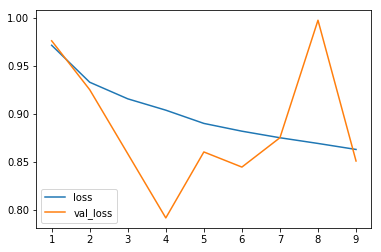

In [45]:
epochs =  range(1,10)
plt.plot(epochs,mod.history['loss'],label='loss')
plt.plot(epochs,mod.history['val_loss'],label='val_loss')
plt.yticks()
plt.legend()
plt.show()